# Fixed point iterations

by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

$f:\mathbb{R}^d\mapsto\mathbb{R}^d$

* Need to come up with $g(x)$ such that 
$$ f(x^*)=0 \iff x^* = g(x^*) $$

* Introduce the fixed point iteration for $g$: $$ x_{k+1} := g(x_k).$$

**What should $g(x)$ be?** 
So that $x_k\longrightarrow x^*$



## Linear systems of equations
Let $$f(x)=Ax-b,$$
where $A$ is an $d\times d$ invertible matrix, and $x,b$ are two vectors in $\mathbb{R}^d$.
We want to find the solution of $f(x)=0$.

Typically, we write the above linear system of equations as 
$$ Ax =b $$

We will consider fixed point iterations with $g(x)=Gx+c$.

### General strategy for creating fixed-point iterations for systems by splitting the matrix

A general strategy in coming up with fixed point iterations is to *split* $A$ into the sum of two matrices, separate the equations accordingly by the equal sign
$$
A=M-N \implies Ax=b \iff Mx=Nx+b
$$
and define the iterations
$$
Mx^{(k+1)} = Nx^{(k)} +b, 
$$

leading to the general form

$$x^{(k+1)}=M^{-1}Nx^{(k)}+M^{-1}b \iff x^{(k+1)}=G x^{(k)}+ c $$

**Of course, $M$ has to be very simple and easy to invert.**

**Both iterative schemes can be used to solve *nonlinear* equations**

** Learniing objectives **:
* Know how convergence of a fixed point iterations is related to the eigenvalues of the matrices involved
* Know in which situtations does one expect that iterative methods be better than direct methods


## Three fixed point iterations to solve linear systems of equations

We first discuss three particular fixed-point iterations (two different $g$'s):

* Jacobi iterations (J)
* Gauss-Seidel iterations (G-S)
* Successive Over Relaxations (SOR): this method builds on top of (G-S)

**Learning objectives**:

* Know how to write Julia code for Jacobi and for Gauss-Seidel methods
* Know how convergence of the iterative methods is related to the spectral radius of $G$
* Know how to use the Jacobi and Gauss-Seidel **ideas** to decouple nonlinear systems of equations into solving smaller ones at a time

### Jacobi iterations

In the Jacobi iterations, $M=D$ is the diagonal of $A$ (and $N$ is $A$ with its diagonal culled out): $$G=G_J:=D^{-1}(L+U)$$ 

$$x^{(k+1)}=G_{J} x^{(k)}+ c_{J}$$

* **Very easy parallelization**


$$ 
a_{11} \mathbf{x_1^{(k+1)}} + a_{12} x_2^{(k)}+a_{13} x_3^{(k)}+...+a_{1n} x_n^{(k)}=b_1 
$$

$$ 
a_{21} x_1^{(k)} + a_{22} \mathbf{x_2^{(k+1)}}+a_{13} x_3^{(k)}+...+a_{1n} x_n^{(k)}=b_2 
$$

$$\vdots$$

**Jacobi method converges for diagonally dominant matrices.**


**Jacobi iterations for solving nonlinear equations:** $ f_1(x) = 0,f_2(x)=0,...,f_n(x)=0, x=(x_1,x_2,...,x_n) $

$$ f_1(\mathbf{x_1^{(k+1)}}, x_2^{(k)}, ..., x_n^{(k)})=0 $$
$$ f_2({x_1^{(k)}}, \mathbf{x_2^{(k+1)}}, ..., x_n^{(k)})=0 $$
$$\vdots$$

In [1]:
using LinearAlgebra

In [2]:
#Example: Jacobi iterations

A=[10. 2. 3.; 4. 15. 6.; 7. 8. 19.]

#What happens if the diagonal elements are smaller, but A is still invertible?
#A=[1. 2. 3.; 4. 5. 6.; 7. 8. 19.]


M=zeros(3,3)

M=diagm( 0=> diag(A))

N=M-A

Minv = inv(M)

b=ones(3)
bb=ones(3)
xx=rand(3)

#the following for-loop is only for illustrating teh concept of Jacobi iteration
#in practice, one should never allocate memory for M or Minv
for k=1:25
   
   global xx,bb
   xx = Minv*(N*xx+bb) 
   println(xx)
end

println("\nChecking the residual: ", A*x-b)

[0.05053332648312581, -0.17956771997209509, -0.2529689571345711]
[0.21180423113479036, 0.15437869579166155, 0.10962149865236209]
[0.03623781124595906, -0.03366306109688892, -0.09040311496193816]
[0.13385354670795924, 0.09316449631918618, 0.05345472684491567]
[0.06533068268268807, 0.009590496806577939, -0.03591004197416863]
[0.10885491323093499, 0.06360916807428396, 0.024524276145713682]
[0.07992088354142911, 0.027828979346798524, -0.01425567037951667]
[0.0987109052444953, 0.05105669920742557, 0.011469577917663582]
[0.08634778678321582, 0.035755927434402486, -0.005233154230045877]
[0.09441876078213328, 0.0457338518831608, 0.0057641091074878605]
[0.08912399689112149, 0.039182686815102646, -0.0014106389758010238]
[0.09258665432971978, 0.04346452308602135, 0.0032984488021751777]
[0.09031756074214319, 0.04065751265787132, 0.0002198544738837235]
[0.09180254112626063, 0.042494042012541665, 0.0022377354495803736]
[0.09082987096261756, 0.04129089485316502, 0.0009173618955706435]
[0.091466612460

UndefVarError: UndefVarError: x not defined

In [3]:
println("The eigenvalues of Minv*N is important. ")
eigvals(Minv*N)

The eigenvalues of Minv*N is important. 


3-element Array{Float64,1}:
 -0.654780355409762  
  0.22381548783575786
  0.4309648675740044 

In [4]:
#a more appropirate way to implementing the JAcobi iterations
function JacobiIterations!(x, A, b, numitrs)
   
   xnext=copy(x)
   sum=0.0
    
   for itr=1:numitrs 
   for i=1:size(A,1)
        sum=0.0
        for j in [1:i-1; i+1:size(A,2)]
            sum+=A[i,j]*x[j]
        end
        xnext[i] = (b[i]-sum)/A[i,i]
   end
    
   x.=xnext
   #println(itr,": ", x)
   end 
end


function JacobiIterations!(x, A, b, tol; max_itrs=100000)
   
   xnext=copy(x)
   res=1.0

   itr=0
    
   while res>tol && itr<max_itrs
        x.=xnext        
    for i=1:size(A,1)
        sum=0.0
        for j in [1:i-1; i+1:size(A,2)]
            sum+=A[i,j]*x[j]
        end
        xnext[i] = (b[i]-sum)/A[i,i]
    end
    
    res=norm(xnext-x)
    itr+=1
   end 
    
   println("Jacobi finishes in ",itr," iterations.")

end

JacobiIterations! (generic function with 1 method)

In [5]:
x=rand(3)

JacobiIterations!(x, A, b, 25)

println(x)
println(A*x-b)

Jacobi finishes in 0 iterations.
[0.323553813262617, 0.289911152918378, 0.5783193054253175]
[4.550318354738879, 8.112798379378042, 14.572232719266376]


### Gauss-Seidel iterations

In the Gauss-Seidel iterations, $M$ is the lower triangular part of $A$ (including the diagonal)

$$ A= D-L-U, M=D-L, N=U \implies G_{GS}:=(D-L)^{-1}U$$

$$x^{(k+1)}=G_{GS} x^{(k)}+ c_{GS}$$

* This algorithm is of **sequential nature**:
    * Solve for first variable, $x_1$ in the first equation, using the previous guess for all other variables    
$$ 
a_{11} \mathbf{x_1} + a_{12} x_2^{(k)}+a_{13} x_3^{(k)}+...+a_{1n} x_n^{(k)}=b_1 
$$
    Obtain the value of $\mathbf{x_1^{(k+1)}}$.
    
    * Solve for the second variable, $x_2$, in the second equation, using the value $\mathbf{x_1^{(k+1)}}$, and the previous guess for all other variables
$$ 
a_{21} \mathbf{x_1^{(k+1)}} + a_{22} \mathbf{x_2}+a_{13} x_3^{(k)}+...+a_{1n} x_n^{(k)}=b_2 
$$
    Obtain the value of $\mathbf{x_2^{(k+1)}}$.
$$ \vdots$$

Solving nonlinear equations: $ f_1(x) = 0,f_2(x)=0,...,f_n(x)=0, x=(x_1,x_2,...,x_n) $

$$ f_1(\mathbf{x_1^{(k+1)}}, x_2^{(k)}, ..., x_n^{(k)})=0 $$
$$ f_2(\mathbf{x_1^{(k+1)}}, \mathbf{x_2^{(k+1)}}, ..., x_n^{(k)})=0 $$
$$\vdots$$

In [6]:
function GaussSeidelIterations!(x, A, b, tol; max_itrs=100000)
   
   itr=0
   res=1.0
    
   while res>tol && itr<max_itrs #for itr=1:numitrs 
    xold=copy(x)
        
    for i=1:size(A,1)
        sum=0.0
            for j in [1:i-1; i+1:size(A,2)]
            sum+=A[i,j]*x[j]
        end
        x[i] = (b[i]-sum)/A[i,i]
    end
        
    res=norm(xold-x)
    itr+=1
   end
   
   println("Gauss-Seidel finishes in ",itr," iterations.")
end

GaussSeidelIterations! (generic function with 1 method)

### Gauss-Seidel is faster than Jacobi

In [58]:
A=[10. 2. 3.; -4. 5. 1.3; 2. 8. 19.]

N=100

A = I(N)+ 0.002*rand(N,N)

display(A)

b=ones(N)

x0=rand(N)

x=copy(x0)
GaussSeidelIterations!(x, A, b, 1e-7)

println(x)
println(A*x-b,"\n")

x=copy(x0)
JacobiIterations!(x, A, b, 1e-7)

println(x)
println(A*x-b)


100×100 Array{Float64,2}:
 1.00157      0.000250114  0.00149694   …  0.000152362  0.00096891 
 0.00112331   1.00066      0.0012599       0.00196979   0.00120999 
 0.000949708  0.00144849   1.00193         5.50479e-5   0.00126919 
 0.00174919   0.000610772  0.00188507      0.000116819  0.00174736 
 0.00152282   0.000825299  0.00126561      2.8276e-5    0.000647735
 0.00160587   0.000913379  0.00177287   …  0.000129018  0.00138372 
 0.00163859   0.000439454  0.00134131      0.00194249   0.0016576  
 0.00161961   0.000643386  0.00181091      0.000847802  0.000494094
 3.86519e-6   0.00194103   0.00183352      0.00089188   0.00116436 
 0.000924208  0.0012276    0.000769738     0.000449646  0.00095254 
 0.000112491  0.00119056   9.38858e-7   …  0.00105343   0.000418245
 0.00049524   0.00181685   0.001806        0.00169527   0.0014174  
 0.00116172   4.9957e-5    0.000502303     0.000196907  0.00138762 
 ⋮                                      ⋱                          
 0.00168877   0.000459

Gauss-Seidel finishes in 6 iterations.
[0.9120309529511862, 0.9134136435738935, 0.912948635440938, 0.9060039177705486, 0.9026038099255504, 0.9110451184619583, 0.9074284029174863, 0.918765349590702, 0.9105146950900884, 0.9065923163744541, 0.913001234240074, 0.9047249312221112, 0.9147624665697199, 0.9111162661508538, 0.9176317230479875, 0.903364453387345, 0.9002610627036045, 0.9030185409403939, 0.9136841881246258, 0.9137164495444415, 0.9098211951329184, 0.9162138112671334, 0.9149218177176396, 0.9093738389861514, 0.9123114313041721, 0.909444685494364, 0.9145052067293258, 0.9133833387846739, 0.9030115836091868, 0.9140474115365999, 0.9086369072804279, 0.8978479852950875, 0.8977784629087492, 0.9096124025316028, 0.9164716800126204, 0.9027854538927532, 0.9080350853705987, 0.9083876019313846, 0.9097797497958655, 0.9174994252940214, 0.9206257643015576, 0.9035102397103149, 0.9145669444492912, 0.9022490434999164, 0.9095006574870261, 0.9006906638241964, 0.9081087668519177, 0.903050671083964, 0.9198

## Successive over relaxation (SOR)

SOR is obtained by *averaging* the Gauss-Seidel update, $x^{(k+1)}_{GS}$, with the approximation computed in the previous iteration, $x^{(k)}$:

$$ x^{(k+1)}_{SOR}:= \omega x^{(k+1)}_{GS}+(1-\omega) x^{(k)}. $$


Three important theorems about SOR:

Theorem (Kahan): Let $a_{ii}\neq 0, i=1,2,\cdots,n$. **If SOR converges, then $0<\omega<2$.**

Theorem (Ostrowski-Reich): **SOR converges for all $0<\omega<2$ iff $A$ is invertible, symmetric, positive definite.**

**Choose $\omega$ to make $\rho(G_{SOR})$ as small as possible.**

* This was pioneered by David Young, here at UT Ausitn in 1950'

Theorem (Young): $\omega_{opt}$ as a function of $\rho(G_J)$.

For more in-depth exposition about the choice of $\omega$, check out GGK, Sec 11.3.4.

## Symmetric Successive over relaxation (SSOR)

Involves two SOR updates:

* One SOR step in which the G-S update involves solving each row of the linear system in **increasing order** (row 1, than row 2,..., row n). 
    * In other words, the G-S iteration is defined by $A=D-L-U=M-N$, with $M=D-L$.

* One SOR step in which the G-S update involves solving each row of the linear system in **decreasing order** (row n, than row (n-1),..., row 1).
    * In other words, the G-S iteration is defined by $A=D-L-U=M-N$, with $M=D-U$.

In [8]:
function SOR!(x, A, b, ω, tol; max_itrs=100000)
   
   sum=0.0
   itr=0
   xold=copy(x)
    
   res=1.0 
    
   while res>tol && itr<max_itrs 
    xold.=x
    for i=1:size(A,1)
        sum=0.0
        for j=1:i-1 
            sum+=A[i,j]*x[j]
        end
        for j=i+1:size(A,2) 
            sum+=A[i,j]*x[j]
        end

        x[i] = ω*(b[i]-sum)/A[i,i]+(1.0-ω)*xold[i]
    end
    res=norm(xold-x)
    itr+=1
   end
   
   println("SOR finishes in ",itr," iterations.")
end

SOR! (generic function with 1 method)

In [62]:
#Example: Jacobi iterations

A=[6. 2. 3.; 4. 11. 6.; 7. 8. 14.]


M=zeros(3,3)

M=diagm( 0=> diag(A,0))

N=M-A

Minv = inv(M)

tol=1e-12

b=ones(3)
x=rand(3)

x0=rand(3)

x=copy(x0)
GaussSeidelIterations!(x, A, b, tol)

println(x)
println(A*x-b,"\n")

x=copy(x0)
JacobiIterations!(x, A, b, tol)

println(x)
println(A*x-b,"\n")

#SOR with non-optimal weight
x=copy(x0)
@time SOR!(x, A, b, 0.68, tol)

println(x)
println(A*x-b,"\n")

Gauss-Seidel finishes in 25 iterations.
[0.17124735729379462, 0.052854122621400344, -0.04439746300198322]
[-3.8125058665627876e-13, -1.3171685964152857e-12, 0.0]

Jacobi finishes in 481 iterations.
[0.17124735729413046, 0.052854122621843184, -0.04439746300180666]
[3.04911651483053e-12, 5.956790616323815e-12, 8.365530490550555e-12]

SOR finishes in 59 iterations.
  0.000050 seconds (137 allocations: 8.188 KiB)
[0.17124735729340707, 0.0528541226203849, -0.04439746300088907]
[-1.4548362514688051e-12, -7.472356067239616e-12, 4.481748305806832e-12]



### Example: solving a two-point boundary value problem for Poisson's equation

$$ -u_{xx} =f(x),~~~0<x<1,~~~u(0)=u(1)=0 $$

* Discretize the unit interval: $x_j = j\Delta x, j=0,1,2,\cdots,N,\Delta x =1/N$

* Approximate the differential equation on the grid nodes:
    $$ -u_{xx} (x_j)=f(x_j) \approx -(u_{j+1}-2u_j+u_{j-1})/\Delta x^2 = f(x_j),~~~j=1,2,\cdots,N-1 $$

* Set the boundary conditions: $u_0=0=u_N$.

This leads to a linear system to solve: $AU=F$.

In [46]:
using LinearAlgebra

N=50
xgrid=range(0.0, stop=1.0, length=N+1) #linspace(0,1,N+1)
Δx=1/N

f=x-> x.^2+0.0*sin(20*x)

#The vector U stores (u1,u2,u3,cdots, u_(N-1))
U=zeros(N-1)

#N-2 because we exclude x=0 and X=1.
#A=spdiagm( (-ones(N-2), 2.0*ones(N-1),-ones(N-2)), [-1,0,1])
A=-2.0 .*diagm(0=>ones(N-1)) .+ diagm(1=>ones(N-2)) .+ diagm(-1=>ones(N-2))
F=collect(f.(xgrid[2:end-1]))

b=F.*Δx^2

@time U=-A\b

Ugs=copy(b)
Uj=copy(U)
Usor=copy(U)

println("\n")
@time GaussSeidelIterations!(Ugs, A, b, 1e-10)

println("\n")
@time JacobiIterations!(Uj, A, b, 1e-10)

  0.000204 seconds (11 allocations: 38.938 KiB)


Gauss-Seidel finishes in 4016 iterations.
  0.033931 seconds (204.90 k allocations: 96.885 MiB, 18.40% gc time)


Jacobi finishes in 8021 iterations.
  0.050704 seconds (401.13 k allocations: 189.708 MiB, 9.77% gc time)


The timings above for Gauss-Seidel and Jacobi iterations are not fair, because in real implementation, one would skip a lof of multiplications involving the zero entries in the matrix $A$.

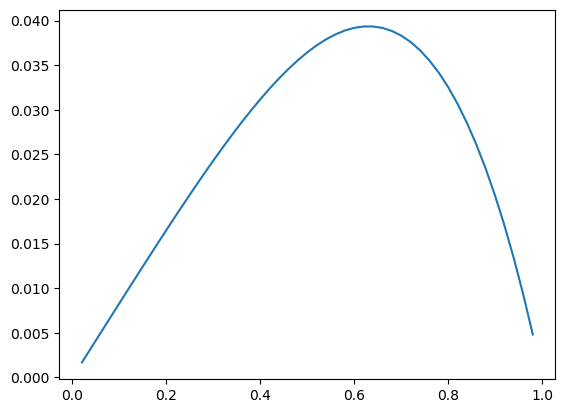

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13ad57b00>

In [11]:
using PyPlot

plot(xgrid[2:end-1], U)

### Poisson equation in three dimensions

$$-(u_{xx}+u_{yy}+u_{zz})=f(x,y,z),~~~0<x,y,z<1$$

with zero Dirichlet boundary conditions.

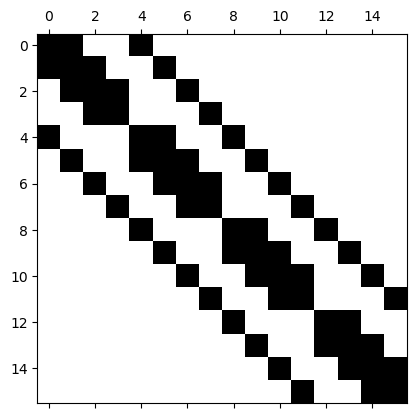

PyObject <matplotlib.image.AxesImage object at 0x13b070e10>

In [12]:
using LinearAlgebra, SparseArrays

N=5
xgrid=range(0,stop=1,length=N+1)
Δx=1/N

#assemling the finite different operator for the left hand side of the PDE
T=spdiagm(0=>-2.0 .*ones(N-1), 1=>ones(N-2), -1=>ones(N-2)) 
Ii=spdiagm( 0=> ones(N-1))

A=kron(T,Ii)+kron(Ii,T)

using PyPlot
spy(A)

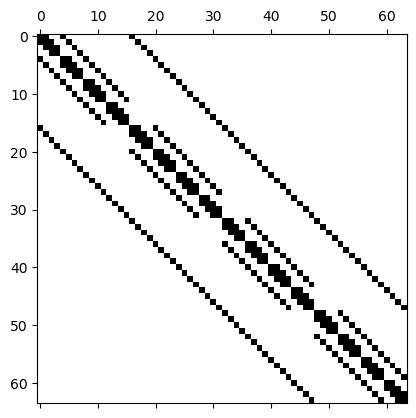

PyObject <matplotlib.image.AxesImage object at 0x13b899dd8>

In [13]:
A=kron(kron(T,Ii),Ii)+ kron(Ii,kron(Ii,T))+ kron(kron(Ii,T),Ii)

size(A)

using PyPlot
spy(A)

In [48]:
N=25
xgrid=range(0,stop=1,length=N+1)
Δx=1/N

f=(x,y)-> x.^2+y+z.^2

#assemling the finite different operator for the left hand side of the PDE
T=spdiagm(0=>-2.0 .*ones(N-1), 1=>ones(N-2), -1=>ones(N-2)) 
Ii=spdiagm( 0=> ones(N-1))

#discretize the Laplace operator in 2D
#A=kron(T,I)+kron(I,T)

#discretize the Laplace operator in 3D
A=kron(kron(T,Ii),Ii)+ kron(Ii,kron(Ii,T))+ kron(kron(Ii,T),Ii)

F=ones(size(A,1))

b=F.*Δx^2

U=copy(F)
Uj=copy(F)
Ugs=copy(F)
Usor=copy(F)

println("size of the matrix:", size(A))

println("Optimal direct solver: ")
@time Ud=A\b

println("LU:")
@time fac=lu(A)
#Step 1:
@time y=fac.L\b[fac.p]
#Step 2:
@time x=fac.U\y

#@time U=inv(fac.U)*inv(fac.L)*b[fac.p]

println("\n")
@time GaussSeidelIterations!(Ugs, A, b, 1e-1)

println("\n")
#@time JacobiIterations!(Uj, A, b, 1e-12)

println("\n")
#@time SOR!(Usor, A, b, 1.5, 1e-12)

size of the matrix:(13824, 13824)
Optimal direct solver: 
  0.548099 seconds (74 allocations: 55.256 MiB, 0.67% gc time)
LU:
  0.276399 seconds (70 allocations: 88.185 MiB, 31.96% gc time)
  0.364837 seconds (82 allocations: 173.523 MiB, 31.28% gc time)
  0.142359 seconds (42 allocations: 86.761 MiB, 20.14% gc time)


Gauss-Seidel finishes in 172 iterations.
302.226181 seconds (4.76 M allocations: 245.111 GiB, 11.84% gc time)






## Convergence of iterative algorithms

Here we discuss the convergence issue for linear systems of equations and *linear* methods:

Solve $Ax=b$ by the fixed point iterations defined below:

Fixed Point Method: $$ x^{(k+1)} = Gx^{(k)}+c $$ where $G$ is a matrix and $x^{(k)}$ and $c$ are vectors.

Solution vector $x^*$ is a fixed point for $Gx+c$: $$x^* = Gx^*+c$$

Derive an equation for the errors:

$$x^{(k+1)}-x^* =G(x^{(k)}-x^*)$$ 

* linearly convergent algorithms: (**the error in the next step is a linear function of the current error**)
$$ e_{n+1} = a e_n $$

### What you need to know
The number $a$ above is related to the Eigenvalues of $G$.

Consider the following simplied situation, where $x^{(0)}-x^*$ happens to be an Eigenvector of $G$, with the associated Eigenvalue denoted by $\lambda$.

Then, we notice that
* $e^{(1)} =\lambda e^{(0)}$ ... 
* $e^{(k)} =\lambda^k e^{(0)}$

So if $|\lambda|<1$, $e^{(k)} \rightarrow 0$ as $k\rightarrow \infty$!

The next step is to assume that $G$ has a complete set of Eigenvalues so we can use the Eigenvectors to form a basis.
$$Gv_j=\lambda_j v_j$$

Write the initial error vector using the new basis (as a linear combination of $v_j$'s):
$$ x^{(0)}-x^* = c_1 v_1+c_2v_2+\cdots+c_n v_n$$

Then we have...

## The conjugate gradient (CG) method of Hestenes and Stiefel (1952)

$$Ax=b$$
* It is optimal for symmetric positive definite systems: $A^T =A,~~~x^TAx>0,~\forall x\neq 0$
* It is a type of **Krylov methods**
* In each iteration, say iteration $k$, the algorithm chooses the next guess, $x^{(k+1)}$, by 
  * minimizes the residual, $r^{(k+1)}:=b-Ax^{(k+1)}$, 
  * in a special norm built from $A$ and $x^{(j)},j=1,2,\cdots,k$.
* Very simple, elegant and fast algorithm.

* We have seen that solving teh model Poisson's problem in 1 and 2 dimenions, the backlash operator is faster than CG. But the situation changes when we solve the Poisson's equation in 3D, for which the matrix has more strides away from teh diagonal.

* See Algorithm 11.15 in GGK or this workbook (instead of BF) for a more comprehensive view of teh CG algorithm.

**Learning objectives**:

* Know when CG is applicable

In [33]:
CG(A,b;kwargs...) = CG(x -> A*x,b;kwargs...)
    
function CG(A::Function, b; tol=1e-2, maxItr=1000)

    n = length(b)

    #initial guess
    x=zeros(n)
    
    #initial residual
    r=b-A(x)

    p = copy(r)
    
    res0  = norm(r)

    itr   = 1 
    
    for itr=1:maxItr
        Ap = A(p)
        pAp= dot(p,Ap)
        α  = dot(r,p)/pAp

        #update the approximate solution
        x.+=α.*p
        
        #update the residual vector
        r.-=α.*Ap
            
        #break the loop when tolerance is met
        if norm(r)/res0 <= tol
            break
        end

        #update search direction
        β = -dot(Ap,r)/pAp           
        p.=r.+β.*p
    end

    println("cg terminates after ", itr, " steps, with residual=", norm(r))
    
    x
end

CG (generic function with 2 methods)

In [37]:
@time uu=CG(A,b, tol=1e-14)

norm(Ud-uu)

cg terminates after 1 steps, with residual=1.7008927367038972e-15
  0.020896 seconds (353 allocations: 9.081 MiB)


3.609376587170471e-14

In [65]:
using KrylovMethods

In [66]:
@time uu=KrylovMethods.cg(A, b, tol=1e-10, maxIter=1500, out=1);

@time uu=KrylovMethods.cg(A, b, tol=1e-10, maxIter=1500, out=1);

@time uu=KrylovMethods.cg(A, b, tol=1e-14, maxIter=1500, out=1);

size(A)

cg iterated maxIter (=1500) times but reached only residual norm 1.05e+00 instead of tol=1.00e-10.
  0.392077 seconds (877.73 k allocations: 44.803 MiB, 5.25% gc time)
cg iterated maxIter (=1500) times but reached only residual norm 1.05e+00 instead of tol=1.00e-10.
  0.000845 seconds (14.55 k allocations: 393.406 KiB)
cg iterated maxIter (=1500) times but reached only residual norm 1.05e+00 instead of tol=1.00e-14.
  0.000858 seconds (14.55 k allocations: 394.094 KiB)


(3, 3)